In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

%matplotlib inline
pd.set_option('display.max_columns',None) #设置显示所有的列，而不是显示。。。

In [2]:
def readData(number=1):
    if number == 1:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_1.txt',sep='\t')
        return df
    elif number == 2:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_2.txt',sep='\t')
        return df
    elif number == 3:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_3.txt',sep='\t')
        return df
    elif number == 4:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_4.txt',sep='\t')
        return df
    elif number == 5:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_5.txt',sep='\t')
        return df
    elif number == 6:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_6.txt',sep='\t')
        return df
    elif number == 7:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_7.txt',sep='\t')
        return df
    elif number == 8:
        df = pd.read_csv('D:\lss\ccfData\HaiKou\dwv_order_make_haikou_8.txt',sep='\t')
        return df

In [3]:
# 将文件添加到dfs列表中
dfs = []
for i in range(1,9):
    dfs.append(readData(i))

for everyDf in dfs:
    everyDf.columns=['order_id',
       'product_id', 'city_id',
       'district', 'county',
       'type', 'combo_type',
       'traffic_type',
       'passenger_count',
       'driver_product_id',
       'start_dest_distance',
       'arrive_time',
       'departure_time',
       'pre_total_fee',
       'normal_time',
       'bubble_trace_id',
       'product_1level',
       'dest_lng', 'dest_lat',
       'starting_lng',
       'starting_lat', 'year',
       'month', 'day']

In [4]:
# 将多个表连接在一起，进行分析。
data = pd.concat(dfs,ignore_index=True)
# data = df.copy()

In [5]:
# 将列名提取出来方便使用
order_id = data.columns[0]
product_id = data.columns[1]    #产品线id
city_id = data.columns[2]
district = data.columns[3]
county = data.columns[4]        #记录县区id
type = data.columns[5]          #订单时效
combo_type = data.columns[6]
traffic_type = data.columns[7]
passenger_count = data.columns[8]
driver_product_id = data.columns[9]   #司机子产品线
start_dest_distance = data.columns[10]   #预估路面距离
arrive_time = data.columns[11]      #到达时间
departure_time = data.columns[12]   #出发时间
pre_total_fee = data.columns[13]    #预估价格
normal_time  = data.columns[14]     #时长
bubble_trace_id = data.columns[15]
product_1level = data.columns[16]   #业务类型
dest_lng  = data.columns[17]
dest_lat  = data.columns[18]
starting_lng = data.columns[19]
starting_lat = data.columns[20]
year = data.columns[21]   
month = data.columns[22]
day = data.columns[23]

In [6]:
# 统计出产品线ID的枚举值
print('产品线ID的枚举值product_id\n',data[product_id].value_counts())

# 统计出城市ID的枚举值
print('\n城市ID的枚举值city_id:\n',data[city_id].value_counts())

# 统计出城市区号的枚举值
print('\n城市区号的枚举值district:\n',data[district].value_counts())

# 统计出二级县区id的枚举值
print('\n二级县区id的枚举值county:\n',data[county].value_counts())

# 统计出订单时效的枚举值
print('\n订单时效的枚举值type:\n',data[type].value_counts())

# 统计出订单类型的枚举值
print('\n订单类型的枚举值combo_type:\n',data[combo_type].value_counts())

# 统计出交通类型的枚举值
print('\n交通类型的枚举值traffic_type:\n',data[traffic_type ].value_counts())

# 统计出乘车人数的枚举值
print('\n乘车人数的枚举值passenger_count:\n',data[passenger_count].value_counts())

# 统计出司机产品线的枚举值
print('\n司机产品线的枚举值driver_product_id:\n',data[driver_product_id].value_counts())

# 统计出一级业务线的枚举值
print('\n一级业务线的枚举值product_1level:\n',data[product_1level].value_counts())

产品线ID的枚举值product_id
 3    14001932
1      156837
2        1393
Name: product_id, dtype: int64

城市ID的枚举值city_id:
 83    14160162
Name: city_id, dtype: int64

城市区号的枚举值district:
 898    14160162
Name: district, dtype: int64

二级县区id的枚举值county:
 460106    5803864
460108    4111768
460107    2532471
460105    1710640
469021       1408
0               9
469023          1
469005          1
Name: county, dtype: int64

订单时效的枚举值type:
 0    13893782
1      266380
Name: type, dtype: int64

订单类型的枚举值combo_type:
 0     14124384
3        19905
2        15765
12         108
Name: combo_type, dtype: int64

交通类型的枚举值traffic_type:
 0    13586319
6      378248
5      195562
3          31
2           2
Name: traffic_type, dtype: int64

乘车人数的枚举值passenger_count:
 0    14160162
Name: passenger_count, dtype: int64

司机产品线的枚举值driver_product_id:
 3    13339729
0      682095
1      137476
2         862
Name: driver_product_id, dtype: int64

一级业务线的枚举值product_1level:
 3    14001932
1      158230
Name: product_1level, d

可以看出来：**订单类型**，**交通类型**，**乘车人数**，出现了异常值。而产品线id和一级业务线数据基本相同。

In [7]:
# 统计缺失值的数量和百分比
total = data.isnull().sum().sort_values(ascending=False)
precent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,precent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
normal_time,1974224,0.139421
bubble_trace_id,199129,0.014063
day,0,0.000000
start_dest_distance,0,0.000000
product_id,0,0.000000


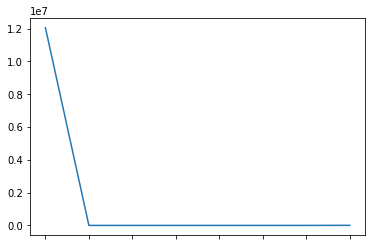

In [9]:
data.drop(index=data[(data[normal_time]<2)].index,inplace=True)
data[normal_time].describe()

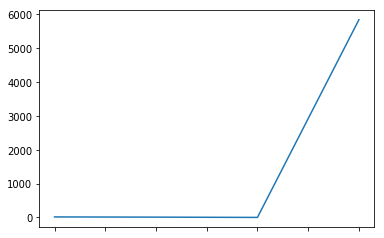

In [17]:
data[normal_time].describe()[['mean','std','min','max']].plot()